# Loading dataset and model

In [1]:
from dataset import SignDataset
from torch.utils.data import DataLoader
import json
import os

In [2]:
ann_file = '../data/dummy_wlasl/wlasl_amaglgam.JSON'

In [4]:
dataset = SignDataset(ann_file=ann_file,
                     root_dir='../data/dummy_wlasl/rawframes/',
                     split='test',
                     clip_len=16,
                     frame_interval=1,
                     num_clips=1,
                     resolution=224,
                     test_mode=True)

In [5]:
iter_ = iter(dataset)

In [6]:
value = next(iter_)

In [7]:
value[0].shape

torch.Size([3, 16, 224, 224])

In [8]:
value[1]

tensor(51)

In [9]:
from torchvision.models import vit_b_32

In [10]:
model = vit_b_32(weights='DEFAULT')

In [11]:
output = model(value[0].permute(1,0,2,3))

In [12]:
output.shape

torch.Size([16, 1000])

## Euclidean Distance Demo

In [13]:
import torch

In [14]:
x1, y1 = 1, 1
x2, y2 = -1, -1

In [15]:
x = torch.tensor([x1, y1])

In [16]:
y = torch.tensor([x2, y2])

In [17]:
(x-y).pow(2)

tensor([4, 4])

In [18]:
(x-y).pow(2).sum().sqrt()

tensor(2.8284)

## Between two 'different' videos

In [19]:
dataset.video_infos

[{'video_path': '../data/dummy_wlasl/rawframes/test/00625',
  'start_index': 1,
  'total_frames': 35,
  'label': 51},
 {'video_path': '../data/dummy_wlasl/rawframes/test/00634',
  'start_index': 1,
  'total_frames': 35,
  'label': 51},
 {'video_path': '../data/dummy_wlasl/rawframes/test/00635',
  'start_index': 1,
  'total_frames': 83,
  'label': 51}]

In [20]:
# Accident 0
accident_0 = dataset[0]

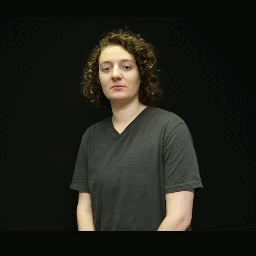

In [21]:
# Accident 1
accident_1 = dataset[1]

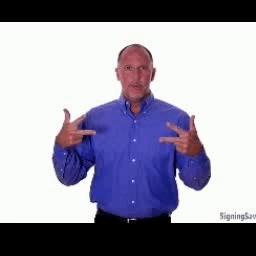

In [22]:
features_0 = model(accident_0[0].permute(1,0,2,3))
features_1 = model(accident_1[0].permute(1,0,2,3))

# Get the Euclidean distance
(features_1-features_0).pow(2).sum().sqrt()

tensor(123.0046, grad_fn=<SqrtBackward0>)

## Between two 'similar' videos

In [23]:
# Accident 3
accident_2 = dataset[2]

In [24]:
x = dataset[2][0]
y = dataset[2][0]
torch.all(x.eq(y))

tensor(True)

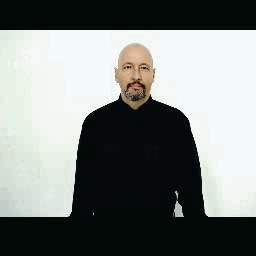

In [25]:
accident_2 = dataset[2]
with torch.inference_mode():
    features_0 = model(accident_0[0].permute(1,0,2,3))
    features_2 = model(accident_2[0].permute(1,0,2,3))

# Get the Euclidean distance
(features_0-features_2).pow(2).sum().sqrt()

tensor(93.8754)

In [26]:
features_1 = model(accident_1[0].permute(1,0,2,3))
features_2 = model(accident_2[0].permute(1,0,2,3))

# Get the Euclidean distance
(features_1-features_2).pow(2).sum().sqrt()

tensor(117.3335, grad_fn=<SqrtBackward0>)